<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/Entregable/ProyectoFinalIvanRodriguezGoyenaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos del Proyecto


El objetivo principal de este trabajo es analizar c√≥mo var√≠a el precio final de los pedidos de tacos (Price ($)) en funci√≥n de distintas variables operativas, temporales y geogr√°ficas presentes en el conjunto de datos.

El an√°lisis se centra especialmente en variables categ√≥ricas, como la hora del d√≠a, el mes, el momento del d√≠a (ma√±ana, tarde, noche) y la ubicaci√≥n de entrega, para identificar patrones de comportamiento que puedan incidir en el valor final pagado por los clientes.

Adicionalmente, se incorporan variables num√©ricas como la cantidad de toppings, la distancia de entrega, el monto de la propina y la duraci√≥n de la entrega, con el objetivo de complementar la explicaci√≥n del precio desde un enfoque multivariable.

A lo largo del trabajo se aplican herramientas de an√°lisis exploratorio, visualizaci√≥n y modelado predictivo, buscando tanto describir los factores que influyen en el precio como evaluar su capacidad explicativa. El enfoque general est√° orientado a comprender el impacto de las distintas categor√≠as en el precio, m√°s que a optimizar un modelo de predicci√≥n.

# Carga del DATASET e informacion general

In [3]:
import pandas as pd
import numpy as np

# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Vista general del dataset
print("Primeras filas del dataset:")
print(df.head())

# Dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Informaci√≥n general
print("\nInformaci√≥n del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estad√≠sticas descriptivas de variables num√©ricas
print("\nResumen estad√≠stico:")
print(df.describe())

# Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

Primeras filas del dataset:
   Order ID   Restaurant Name     Location        Order Time  \
0    770487      El Taco Loco     New York  01-08-2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0  01-08-2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  
0               5           3.01       9.25     2.22          False  
1             

# An√°lisis Exploratorio y Reprocesamiento



Se realiz√≥ una limpieza inicial y un an√°lisis exploratorio completo del dataset, identificando las variables relevantes y comprendiendo su distribuci√≥n y tipo. Se convirtieron las fechas a formatos √∫tiles (fecha, mes, hora, d√≠a de la semana) para enriquecer la informaci√≥n temporal, y se prepararon variables categ√≥ricas para su posterior codificaci√≥n. Esta etapa fue fundamental para asegurar la calidad de los datos y sentar las bases para el modelado.




### Transformaciones Realizadas

In [4]:
# Cambio de formato Fecha y Extraccion Dia , Mes, A√±o, Hora , Dia de semana , Fin de semana.


df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')
df["Fecha"] = df["Order Time"].dt.date
df["Hora"] = df["Order Time"].dt.hour
df["Mes"] = df["Order Time"].dt.month
df['Nombre_Mes'] = df['Order Time'].dt.strftime('%B')
df['A√±o'] = df['Order Time'].dt.year
df["D√≠a de Semana"] = df["Order Time"].dt.day_name()
df['Es_Finde'] = df['D√≠a de Semana'].isin(['Saturday', 'Sunday'])


# Clasificacion momento del Dia
def asignar_momento(hora):
    if 6 <= hora < 12:
        return 'Ma√±ana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Momento_del_d√≠a'] = df['Hora'].apply(asignar_momento)

### Multigraficos Exploratorios

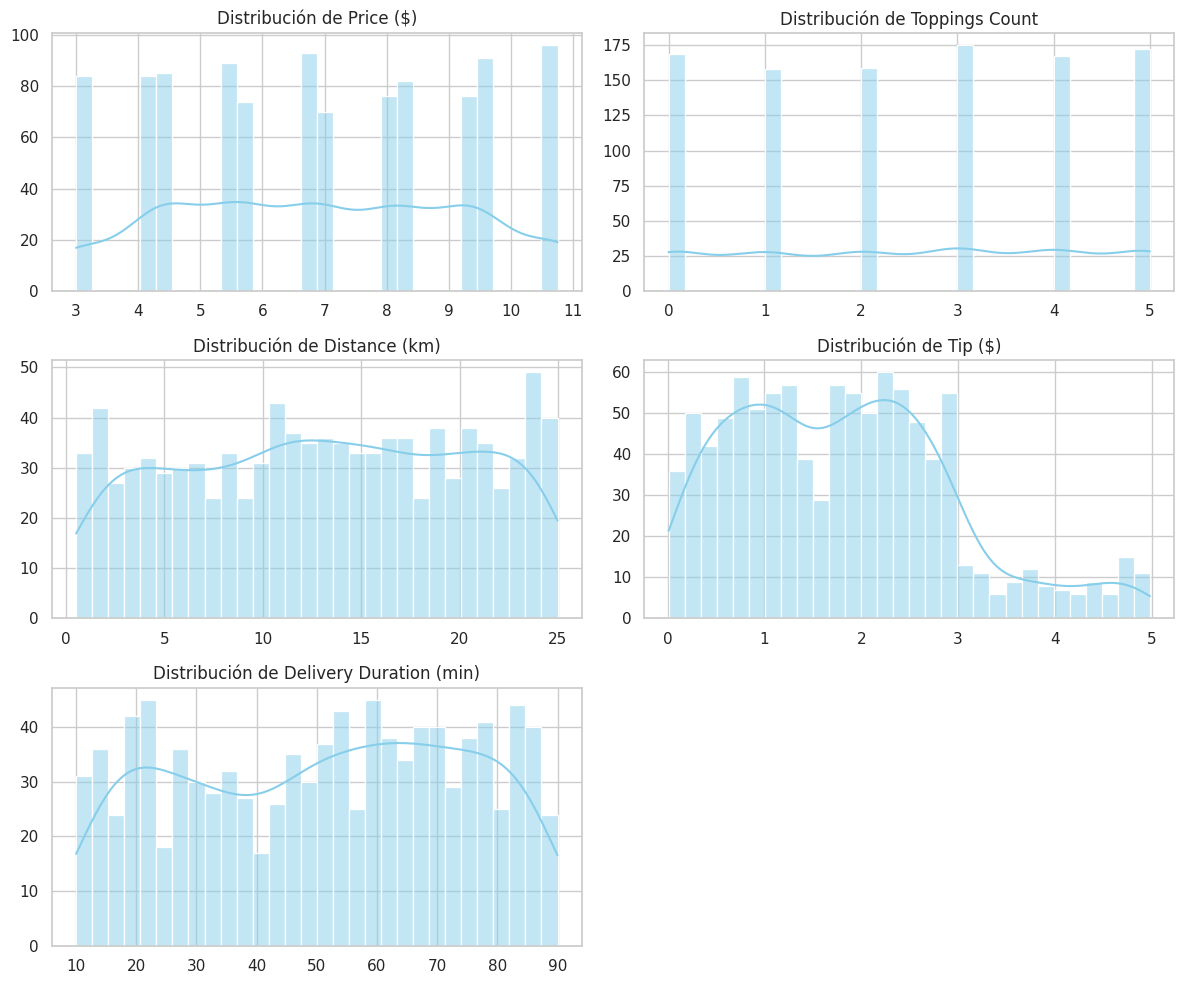

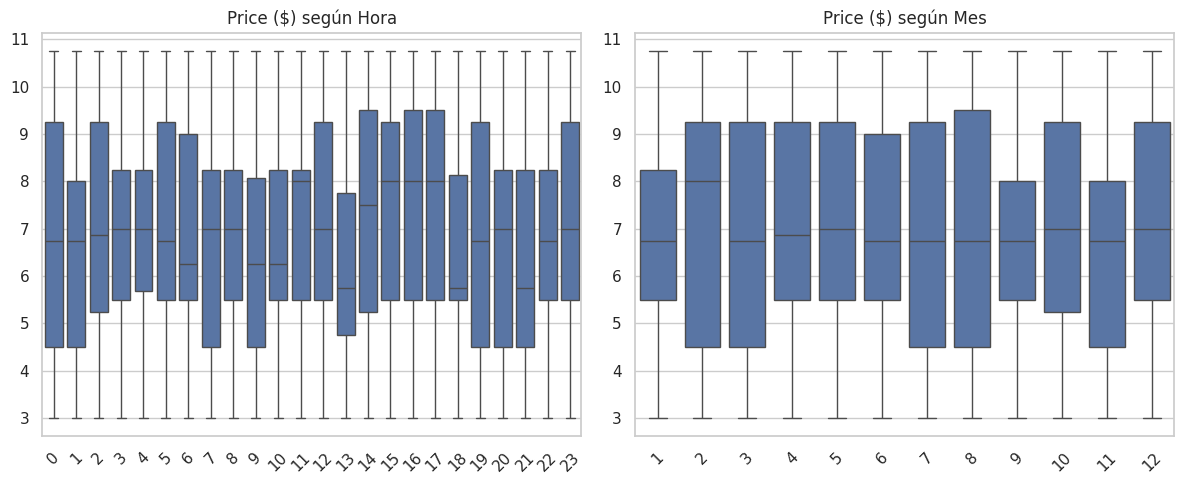

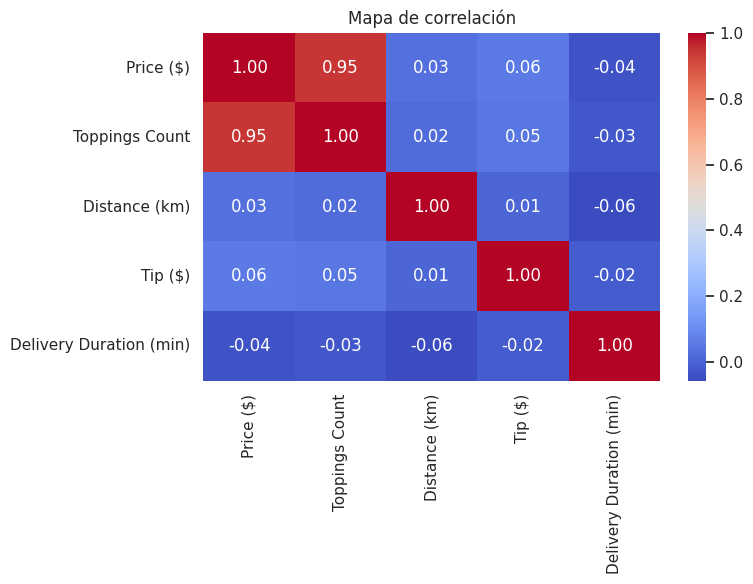

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import math  # ‚úÖ Import necesario

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Variables clave
vars_numericas = ['Price ($)', 'Toppings Count', 'Distance (km)', 'Tip ($)', 'Delivery Duration (min)']
vars_categoricas = ['Hora', 'Mes']

# 1. Histogramas de variables num√©ricas
fig, axes = plt.subplots(nrows=math.ceil(len(vars_numericas) / 2), ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(vars_numericas):
    sns.histplot(df[var].dropna(), kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuci√≥n de {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar ejes vac√≠os si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. Boxplots de Price ($) seg√∫n variables categ√≥ricas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, var in enumerate(vars_categoricas):
    sns.boxplot(x=var, y='Price ($)', data=df, ax=axes[i])
    axes[i].set_title(f'Price ($) seg√∫n {var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# 3. Heatmap de correlaci√≥n entre variables num√©ricas
plt.figure(figsize=(8, 6))
corr = df[vars_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlaci√≥n')
plt.tight_layout()
plt.show()



# Hipotesis y respuestas

In [6]:
# Hip√≥tesis 1: ¬øCu√°nto influye la cantidad de toppings en el precio?
print("üîπ Hip√≥tesis 1: A mayor cantidad de toppings, mayor ser√° el precio del pedido.\n")

print("Promedio de precio seg√∫n la cantidad de toppings:")
print(df.groupby('Toppings Count')['Price ($)'].mean().round(2))

print("\nCorrelaci√≥n entre cantidad de toppings y precio:")
print(df['Toppings Count'].corr(df['Price ($)']).round(3))

print("\n" + "="*60 + "\n")


# Hip√≥tesis 2: ¬øEl precio aumenta con la distancia del delivery?
print("üîπ Hip√≥tesis 2: A mayor distancia de entrega, mayor ser√° el precio del pedido.\n")

df['Rango_distancia'] = pd.cut(df['Distance (km)'], bins=[0, 1, 3, 5, 10, 20], right=False)

print("Precio promedio por rango de distancia:")
print(df.groupby('Rango_distancia')['Price ($)'].mean().round(2))

print("\nCorrelaci√≥n entre distancia y precio:")
print(df['Distance (km)'].corr(df['Price ($)']).round(3))

print("\n" + "="*60 + "\n")


# Hip√≥tesis 3: ¬øLos pedidos m√°s caros reciben propinas mayores?
print("üîπ Hip√≥tesis 3: Los pedidos con precios m√°s altos reciben propinas mayores.\n")

print("Correlaci√≥n entre propina y precio:")
print(df['Tip ($)'].corr(df['Price ($)']).round(3))

df['Rango_precio'] = pd.cut(df['Price ($)'], bins=[0, 10, 20, 30, 50], right=False)

print("\nPromedio de propina por rango de precio:")
print(df.groupby('Rango_precio')['Tip ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hip√≥tesis 4: ¬øHay horarios con precios m√°s altos?
print("üîπ Hip√≥tesis 4: Hay horarios del d√≠a en los que el precio promedio es mayor.\n")

print("Precio promedio por momento del d√≠a:")
print(df.groupby('Momento_del_d√≠a')['Price ($)'].mean().round(2))

print("\nPrecio promedio por hora:")
print(df.groupby('Hora')['Price ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hip√≥tesis 5: ¬øEl precio var√≠a seg√∫n el mes?
print("üîπ Hip√≥tesis 5: Existen meses con precios promedio m√°s altos que otros.\n")

print("Precio promedio por mes:")
print(df.groupby('Mes')['Price ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hip√≥tesis 6: ¬øAlgunas locaciones venden a precios m√°s altos?
print("üîπ Hip√≥tesis 6: Algunas locaciones venden sistem√°ticamente a precios m√°s altos.\n")

print("Precio promedio por locaci√≥n:")
print(df.groupby('Location')['Price ($)'].mean().sort_values(ascending=False).round(2))

print("\n" + "="*60 + "\n")


üîπ Hip√≥tesis 1: A mayor cantidad de toppings, mayor ser√° el precio del pedido.

Promedio de precio seg√∫n la cantidad de toppings:
Toppings Count
0     3.75
1     4.95
2     6.16
3     7.45
4     8.82
5    10.09
Name: Price ($), dtype: float64

Correlaci√≥n entre cantidad de toppings y precio:
0.946


üîπ Hip√≥tesis 2: A mayor distancia de entrega, mayor ser√° el precio del pedido.

Precio promedio por rango de distancia:
Rango_distancia
[0, 1)      6.70
[1, 3)      6.51
[3, 5)      6.75
[5, 10)     6.87
[10, 20)    7.06
Name: Price ($), dtype: float64

Correlaci√≥n entre distancia y precio:
0.031


üîπ Hip√≥tesis 3: Los pedidos con precios m√°s altos reciben propinas mayores.

Correlaci√≥n entre propina y precio:
0.059

Promedio de propina por rango de precio:
Rango_precio
[0, 10)     1.81
[10, 20)    1.73
[20, 30)     NaN
[30, 50)     NaN
Name: Tip ($), dtype: float64


üîπ Hip√≥tesis 4: Hay horarios del d√≠a en los que el precio promedio es mayor.

Precio promedio por momento

/tmp/ipython-input-6-1856122361.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Rango_distancia')['Price ($)'].mean().round(2))
/tmp/ipython-input-6-1856122361.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Rango_precio')['Tip ($)'].mean().round(2))


# Regresion

### Comparaci√≥n de Modelos de Regresi√≥n

Se evaluaron diferentes modelos de regresi√≥n lineal para medir su desempe√±o.
El modelo Ridge mostro la mejor capacidad predictiva, con un R2 promedio cercano al 0.89 y bajo error medio cuadr√°tico.
Podemos entender que el modelo explica bien la variabilidad del precio usando las variables seleccionadas y es robusto frente a la variabilidad del conjunto de datos.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

df_reg = df.copy()

# Definicion de Features
features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_d√≠a'
]

X = df_reg[features]
y = df_reg['Price ($)']

# Identificacion Variables Categoricas y Numericas

categorical_features = ['Location', 'Momento_del_d√≠a']
numerical_features = [col for col in features if col not in categorical_features]

# Aplicacion one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
models = {
    'Linear': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    'Lasso': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())]),
    'ElasticNet': Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())])
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': name, 'MSE': mse, 'R¬≤': r2})

results_df = pd.DataFrame(results).sort_values(by='R¬≤', ascending=False)
print(results_df)

       Modelo       MSE        R¬≤
1       Ridge  0.557827  0.889915
0      Linear  0.558048  0.889871
3  ElasticNet  0.852145  0.831832
2       Lasso  0.867871  0.828729


### Grafico de Prediccion VS Real y Grafico de Residuos

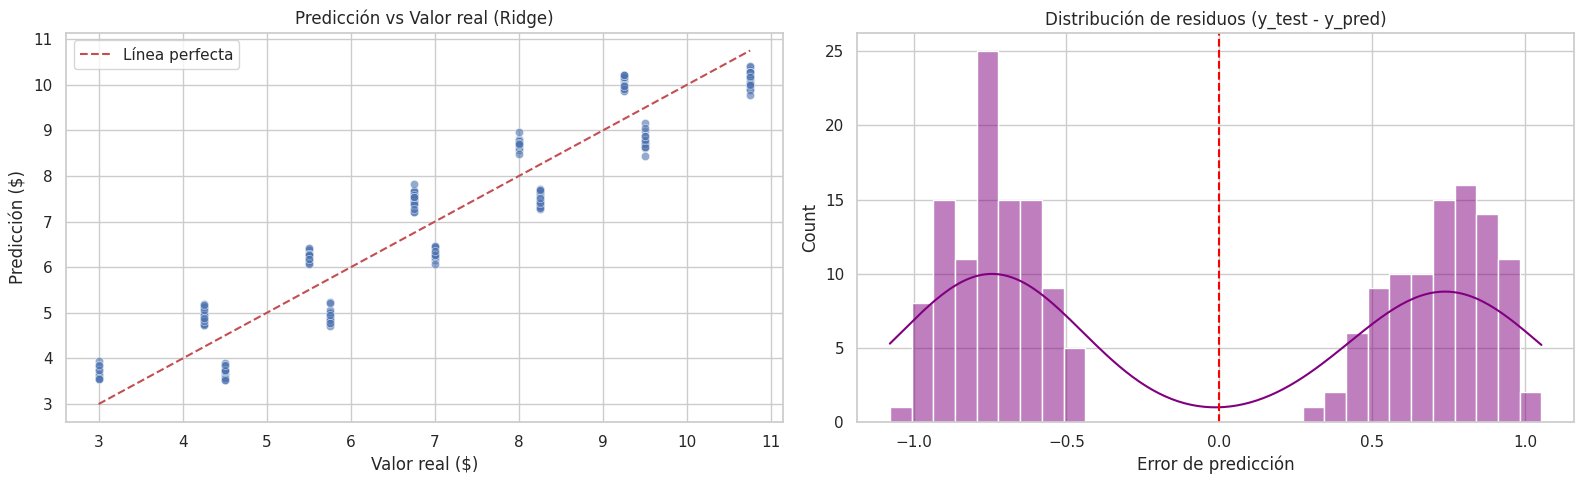

üìä M√©tricas de evaluaci√≥n del modelo Ridge:
MAE  (Error absoluto medio):       $0.74
MSE  (Error cuadr√°tico medio):     0.56
RMSE (Ra√≠z del error cuadr√°tico):  0.75
R¬≤   (Coeficiente de determinaci√≥n): 0.8854


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 0. Definir features y target
features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_d√≠a'
]

X = df[features]
y = df['Price ($)']

# 1. Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Preprocesamiento
numeric_features = [
    'Toppings Count', 'Distance (km)', 'Tip ($)', 'Delivery Duration (min)', 'Hora', 'Mes'
]
categorical_features = ['Location', 'Momento_del_d√≠a']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 3. Procesar los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Entrenar modelo Ridge
ridge = Ridge()
ridge.fit(X_train_processed, y_train)

# 5. Predecir y calcular residuos
y_pred = ridge.predict(X_test_processed)
residuals = y_test - y_pred


# 6 y 7. Gr√°ficos: Predicci√≥n vs Real y Distribuci√≥n de residuos
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gr√°fico 1
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='L√≠nea perfecta')
axes[0].set_xlabel('Valor real ($)')
axes[0].set_ylabel('Predicci√≥n ($)')
axes[0].set_title('Predicci√≥n vs Valor real (Ridge)')
axes[0].legend()

# Gr√°fico 2
sns.histplot(residuals, kde=True, bins=30, color='purple', ax=axes[1])
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Distribuci√≥n de residuos (y_test - y_pred)')
axes[1].set_xlabel('Error de predicci√≥n')

plt.tight_layout()
plt.show()


# 8. M√©tricas de evaluaci√≥n
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("üìä M√©tricas de evaluaci√≥n del modelo Ridge:")
print(f"MAE  (Error absoluto medio):       ${mae:.2f}")
print(f"MSE  (Error cuadr√°tico medio):     {mse:.2f}")
print(f"RMSE (Ra√≠z del error cuadr√°tico):  {rmse:.2f}")
print(f"R¬≤   (Coeficiente de determinaci√≥n): {r2:.4f}")

### Validacion Cruzada

In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_d√≠a'
]

X = df_reg[features]
y = df_reg['Price ($)']


categorical_features = ['Location', 'Momento_del_d√≠a']
numerical_features = [col for col in features if col not in categorical_features]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])



kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrica: R¬≤
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("R¬≤ por fold:", r2_scores)
print("Promedio R¬≤:", r2_scores.mean())

#  Metrica: MSE
mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print("\nMSE por fold:", mse_scores)
print("Promedio MSE:", mse_scores.mean())

R¬≤ por fold: [0.88532526 0.90253201 0.90580965 0.88172533 0.88334715]
Promedio R¬≤: 0.8917478832370772

MSE por fold: [0.56462955 0.55725128 0.55841397 0.59857607 0.56664831]
Promedio MSE: 0.5691038354092008


### Grafico Validacion Cruzada

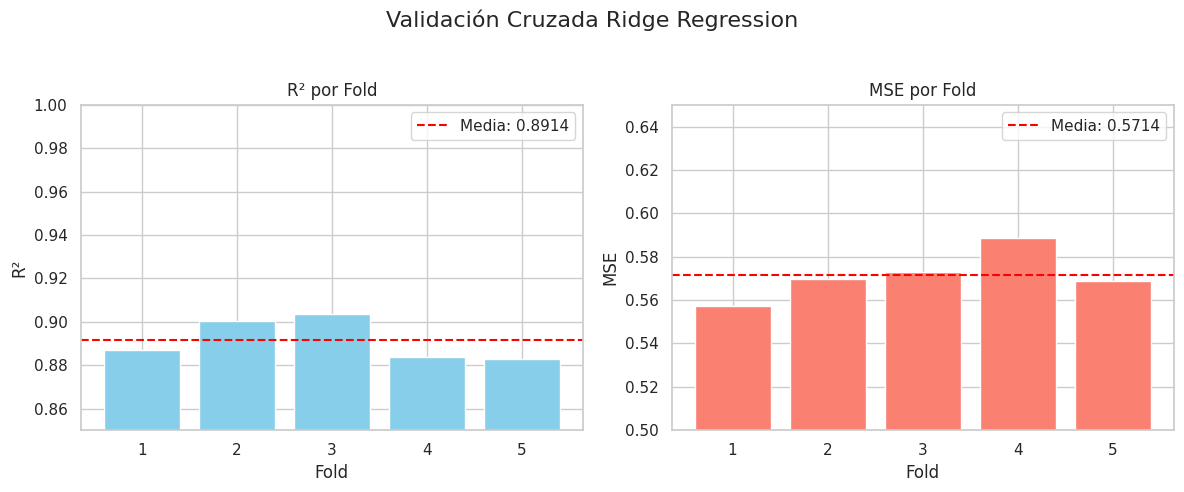

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados (ejemplo con tus datos)
r2_scores = np.array([0.8867899, 0.90036919, 0.90338411, 0.8836605, 0.88293954])
mse_scores = np.array([0.55741803, 0.56961671, 0.57279397, 0.5887824, 0.56862832])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico R¬≤
axs[0].bar(range(1, 6), r2_scores, color='skyblue')
axs[0].set_title('R¬≤ por Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('R¬≤')
axs[0].set_ylim([0.85, 1])
axs[0].axhline(r2_scores.mean(), color='red', linestyle='--', label=f'Media: {r2_scores.mean():.4f}')
axs[0].legend()

# Gr√°fico MSE
axs[1].bar(range(1, 6), mse_scores, color='salmon')
axs[1].set_title('MSE por Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0.5, 0.65])
axs[1].axhline(mse_scores.mean(), color='red', linestyle='--', label=f'Media: {mse_scores.mean():.4f}')
axs[1].legend()

plt.suptitle('Validaci√≥n Cruzada Ridge Regression', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#  Conclusi√≥n del modelo de regresi√≥n
Luego de comparar diferentes modelos de regresi√≥n lineal (Linear, Ridge, Lasso y ElasticNet), el modelo Ridge Regression demostr√≥ ser el m√°s eficiente para predecir el precio de los tacos (Price ($)) a partir de variables como:

Cantidad de toppings

Distancia de entrega

Propina

Duraci√≥n del delivery

Hora y mes del pedido

Localizaci√≥n y momento del d√≠a (como variables categ√≥ricas codificadas)

El rendimiento del modelo fue evaluado con m√©tricas de error y poder explicativo, obteniendo:

R¬≤ promedio en validaci√≥n cruzada (5 folds): 0.89
‚Üí El modelo explica aproximadamente el 89% de la variabilidad en el precio.

MSE promedio: alrededor de 0.57
‚Üí Los errores de predicci√≥n son bajos y consistentes entre los pliegues.

Adem√°s, los gr√°ficos de residuos muestran una distribuci√≥n aproximadamente normal, centrada en cero, lo que indica que no hay sesgos sistem√°ticos en las predicciones.

En resumen, el modelo Ridge ofrece predicciones precisas y generalizables, siendo una herramienta confiable para estimar el precio de los pedidos a partir de informaci√≥n operativa del sistema de ventas.

# Conclusion Final y Reflexion del Trabajo Practico


En este trabajo pr√°ctico tuve la oportunidad de aplicar por primera vez conceptos y herramientas del an√°lisis de datos a un caso real: un conjunto de registros de ventas de tacos. A lo largo del desarrollo, explor√© la informaci√≥n, formul√© hip√≥tesis y realic√© visualizaciones para entender mejor c√≥mo se comportan ciertas variables clave como el precio, la cantidad de ingredientes, las propinas y los tiempos de entrega.

Adem√°s, como parte de la consigna, seleccion√© algunas variables num√©ricas y categ√≥ricas relevantes para entrenar distintos modelos de regresi√≥n. El objetivo fue predecir el precio de un pedido en funci√≥n de variables como la cantidad de toppings, la distancia recorrida o el momento del d√≠a. Despu√©s de comparar diferentes modelos, el que obtuvo el mejor rendimiento fue Ridge Regression, con un buen nivel de precisi√≥n (R¬≤ de aproximadamente 0,89).

M√°s all√° de los resultados, lo m√°s valioso del trabajo fue el proceso: aprend√≠ a limpiar datos, visualizarlos, plantear preguntas de negocio, usar modelos simples y evaluar su desempe√±o. Tambi√©n entend√≠ mejor la importancia de cada etapa en un an√°lisis de datos completo.

Si bien a√∫n me queda mucho por aprender, este primer acercamiento me permiti√≥ poner en pr√°ctica los conceptos b√°sicos del mundo de los datos y me motiv√≥ a seguir profundizando en herramientas como Python, SQL y t√©cnicas de visualizaci√≥n.